<a href="https://colab.research.google.com/github/aregeezra/AuttolibCarProject/blob/main/Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#autolibCarSharingnCharging

# 0.0 import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from IPython.core.display  import HTML
from IPython.display       import Image
import random
import math
import missingno as msno
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 0.1 Helper Function

In [ ]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = chisquare( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)

    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )
def settings():
  %matplotlib inline

  plt.style.use( 'bmh' )
  plt.rcParams['figure.figsize'] =[25,12] 
  plt.rcParams['font.size'] = 24
  
  display( HTML( '<style>.container { width:100% !important; }</style>') )
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  pd.set_option( 'display.expand_frame_repr', False )
  
  sns.set()

In [ ]:
settings()

# 0.3 Loading data

In [ ]:
df = pd.read_csv('./autolib.csv')

In [ ]:
df.sample(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
11977,93390,1/28/2018,1440,6,weekend,4,3,0,0,0,0,0,0
15762,95100,6/9/2018,1440,5,weekend,44,40,4,5,2,6,0,0


In [ ]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

# 0.4 Rename values


In [ ]:
df=df.rename(columns={'Postal code':"PostalCode"})

# 1.0 Data Dimensions

In [ ]:
print(f'Number of rows:{df.shape[0]}')
print(f'Number of columns:{df.shape[1]}')

Number of rows:16085
Number of columns:13


# 1.1 Check Data Types

In [ ]:
pd.DataFrame({'Data Types': df.dtypes})

,Data Types
PostalCode,int64
date,object
n_daily_data_points,int64
dayOfWeek,int64
day_type,object
BlueCars_taken_sum,int64
BlueCars_returned_sum,int64
Utilib_taken_sum,int64
Utilib_returned_sum,int64
Utilib_14_taken_sum,int64


In [ ]:
# function "datetime" transforma the columns "datetime" from object (string) to datetime.
df['date'] = pd.to_datetime( df['date'] )

In [ ]:
pd.DataFrame({'Data Types': df.dtypes})

,Data Types
PostalCode,int64
date,datetime64[ns]
n_daily_data_points,int64
dayOfWeek,int64
day_type,object
BlueCars_taken_sum,int64
BlueCars_returned_sum,int64
Utilib_taken_sum,int64
Utilib_returned_sum,int64
Utilib_14_taken_sum,int64


# 1.2 Check Null Values

In [ ]:
pd.DataFrame({"Missing Values(%)": df.isna().sum()})

,Missing Values(%)
PostalCode,0
date,0
n_daily_data_points,0
dayOfWeek,0
day_type,0
BlueCars_taken_sum,0
BlueCars_returned_sum,0
Utilib_taken_sum,0
Utilib_returned_sum,0
Utilib_14_taken_sum,0


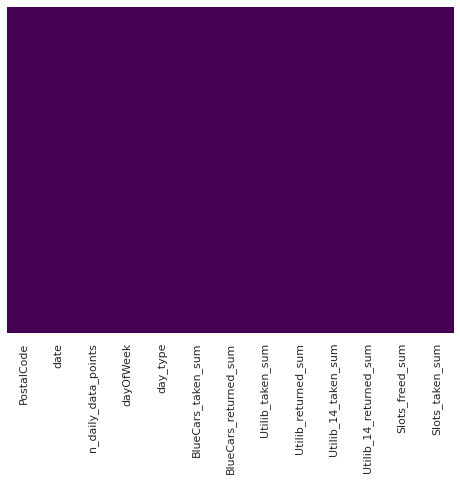

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 1.3 Descriptive Statistical

In [ ]:
num_attributes = df.select_dtypes(include = ["float64", "int64"])
cat_attributes = df.select_dtypes(exclude = ["float64", "int64", "datetime64"])


In [ ]:
num_attributes.sample()

,PostalCode,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
13184,94100,1439,1,2,1,1,2,0,0,0,0


In [ ]:
cat_attributes.sample()

,day_type
13234,weekday


# 1.3.2 Numerical Attributes

In [ ]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T
d7 = pd.DataFrame( num_attributes.apply( lambda x: x.var() ) ).T
# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6, d7] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis', 'variance'])

In [ ]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis,variance
0,PostalCode,75001.0,95880.0,20879.0,88791.293876,92340.0,7647.104280,-1.168778,-0.542143,5.848184e+07
1,n_daily_data_points,1174.0,1440.0,266.0,1431.330619,1440.0,33.211018,-5.742776,36.594846,1.103040e+03
2,dayOfWeek,0.0,6.0,6.0,2.969599,3.0,2.008316,0.018824,-1.260994,4.033582e+00
3,BlueCars_taken_sum,0.0,1352.0,1352.0,125.926951,46.0,185.420815,2.406355,6.172692,3.438302e+04
4,BlueCars_returned_sum,0.0,1332.0,1332.0,125.912714,46.0,185.495768,2.412085,6.186288,3.441082e+04
5,Utilib_taken_sum,0.0,54.0,54.0,3.698290,1.0,5.814877,2.556872,7.702362,3.381490e+01
6,Utilib_returned_sum,0.0,58.0,58.0,3.699099,1.0,5.824453,2.578665,7.936357,3.392636e+01
7,Utilib_14_taken_sum,0.0,100.0,100.0,8.600560,3.0,12.869698,2.510924,7.186815,1.656394e+02
8,Utilib_14_returned_sum,0.0,101.0,101.0,8.599192,3.0,12.868593,2.511488,7.185463,1.656110e+02
9,Slots_freed_sum,0.0,360.0,360.0,22.629033,0.0,52.118643,2.597406,6.454514,2.716522e+03


# 1.3.3 Categorical attributes

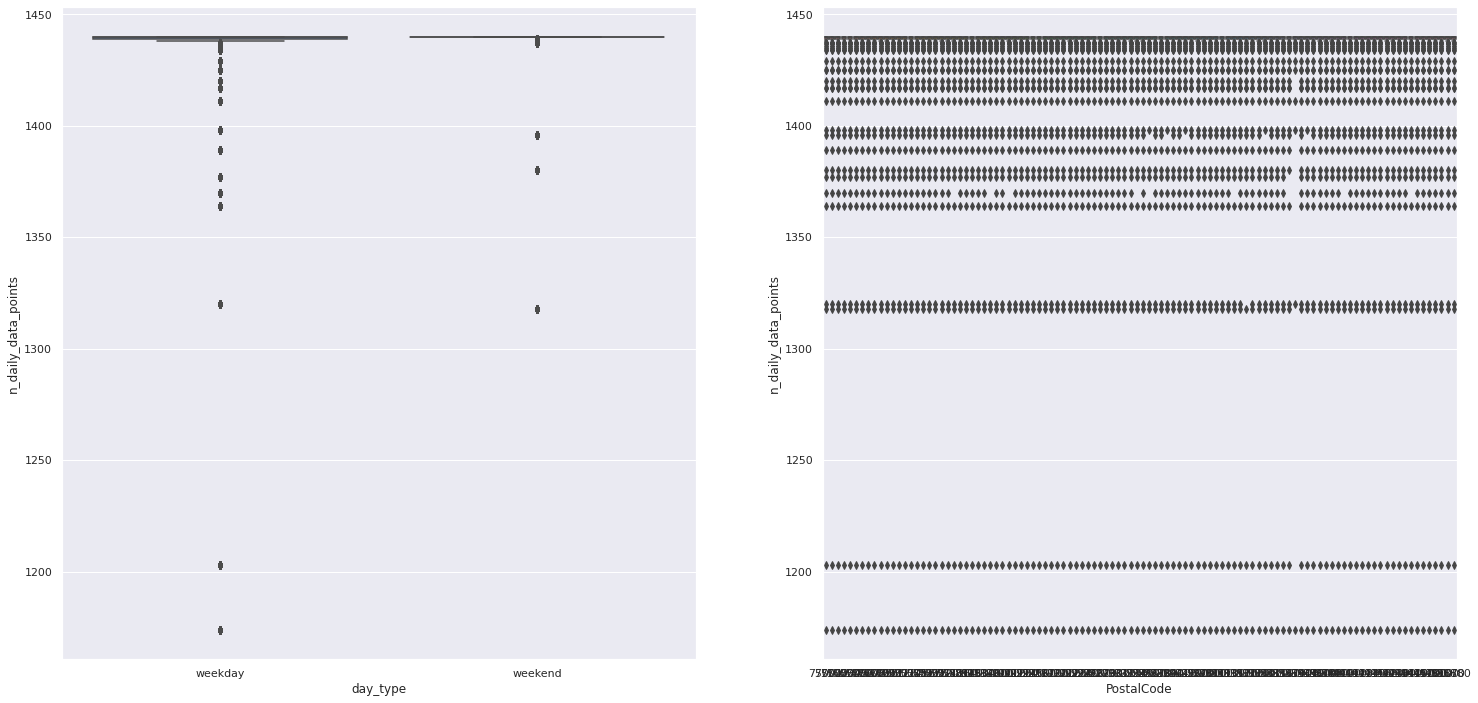

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot( x= 'day_type', y='n_daily_data_points' , data=df )

plt.subplot(1, 2, 2)
sns.boxplot( x= 'PostalCode', y='n_daily_data_points' , data=df )

# 2.0 Feature Engineering


In [ ]:
df1 = df.copy()

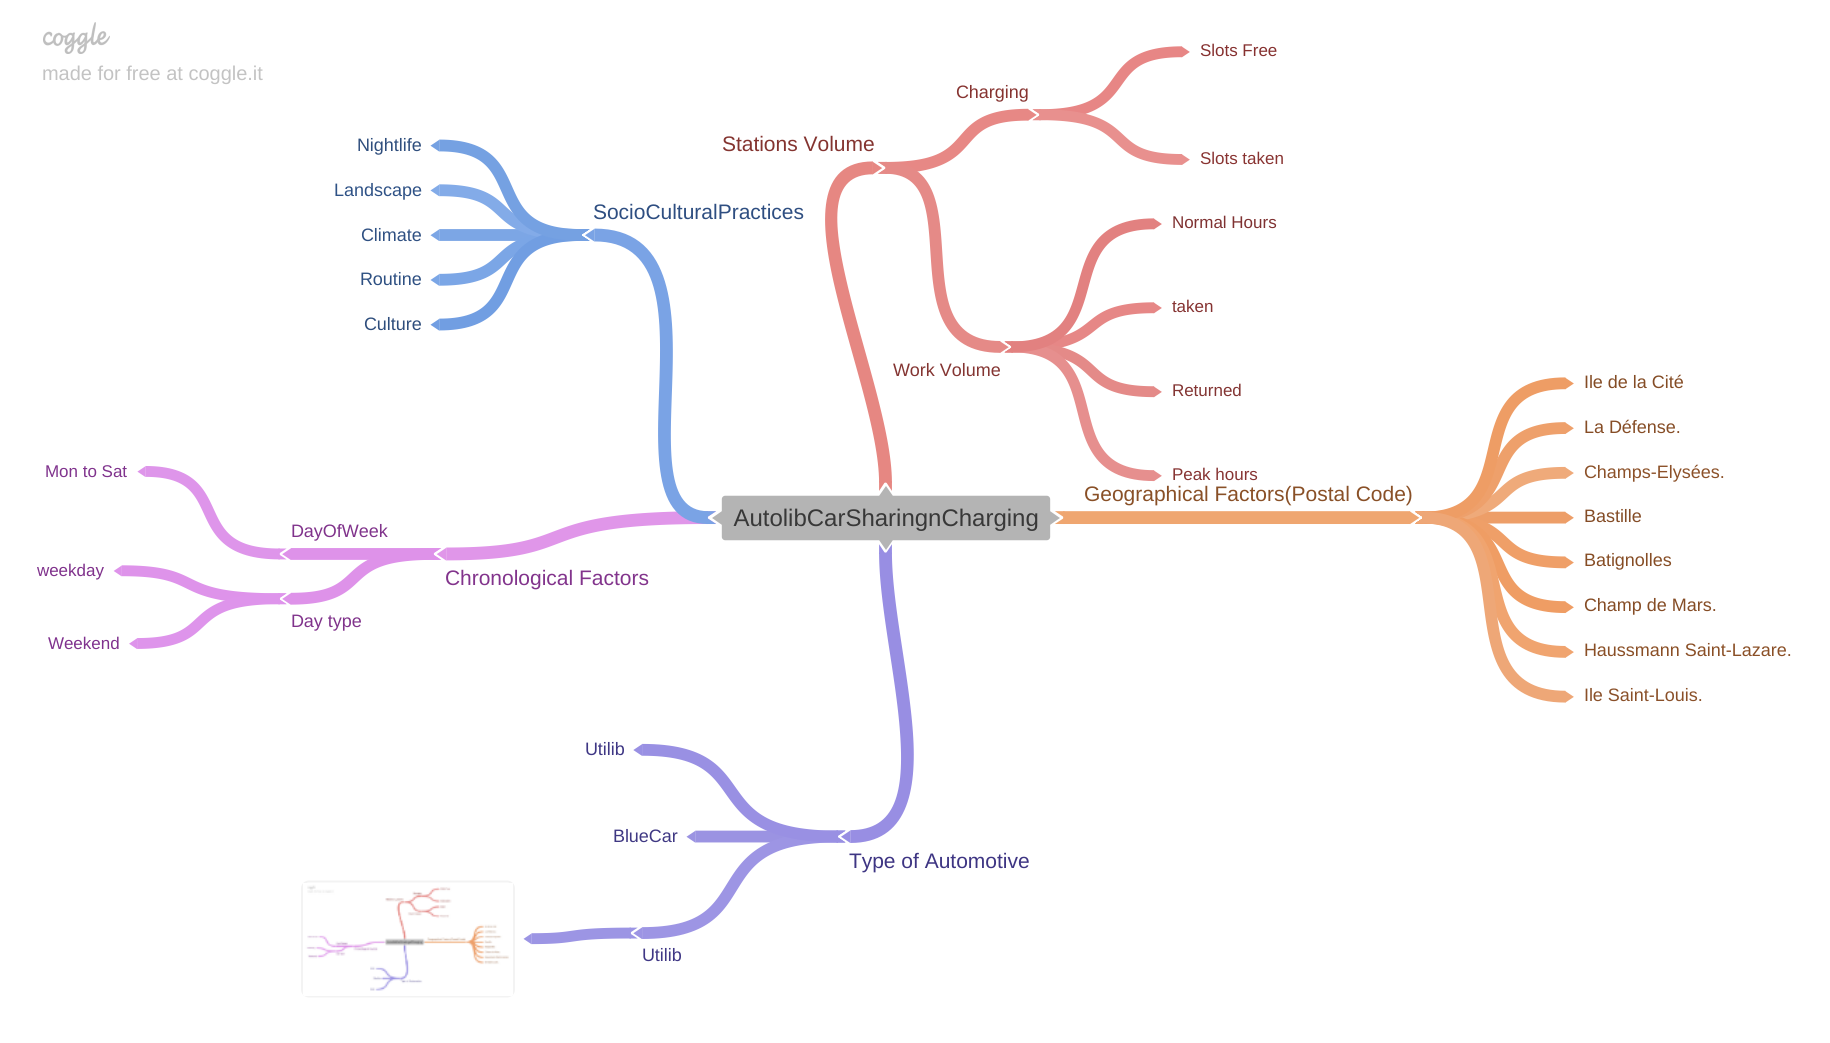

In [ ]:
Image('./AutolibCarSharingnCharging.png')

# 2.1 Creation of Hypotheses

## 2.1.1 Geographical Hypotheses


1.  Majority of the car activity around cities

2. Seasons with higher temperatures has a lot of car activity
  




## 2.1.2 Sociocultural Hypotheses

 1. Routines like going to work in the morning and coming back from contribute to car activity

2. Cities have a high car activity than suburbs


3. Weekdays periods have a high car activity

# 2.1.3 Automotive Hypotheses
1. Cars with high electric milaege have a higher activity



# 2.2 Final List Hypotheses

1. Weekdays have a higher activity than 
wekends because of work

2. CBDs have a higher activity of cars than Suburbs

3. Weekends have less activity

4. Holidays have a lot of activity

5. Newer versions of cars have more activity


# 2.3 Feature Engineeering

In [ ]:
df1['month'] = df1['date'].dt.month

In [ ]:
df1.sample()

,PostalCode,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,month
1953,75013,2018-03-26,1439,0,weekday,456,456,18,19,26,17,128,121,3


In [ ]:
df1.dayOfWeek.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
df1.dtypes

PostalCode                         int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
month                              int64
dtype: object

In [ ]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [ ]:
df1.sample(10).T

,14073,4399,10655,840,8283,8367,9051,8657,12263,14747
PostalCode,94160,92000,93170,75006,92360,92360,92410,92380,93440,94340
date,2018-01-16 00:00:00,2018-02-03 00:00:00,2018-03-14 00:00:00,2018-03-05 00:00:00,2018-01-28 00:00:00,2018-04-27 00:00:00,2018-01-20 00:00:00,2018-04-06 00:00:00,2018-03-20 00:00:00,2018-03-10 00:00:00
n_daily_data_points,1440,1438,1440,1440,1440,1440,1439,1364,1440,1440
dayOfWeek,1,5,2,0,6,4,5,4,1,5
day_type,weekday,weekend,weekday,weekday,weekend,weekday,weekend,weekday,weekday,weekend
BlueCars_taken_sum,49,340,41,247,10,12,64,34,5,43
BlueCars_returned_sum,44,335,46,236,8,9,58,31,1,40
Utilib_taken_sum,3,9,2,10,0,1,0,0,0,1
Utilib_returned_sum,2,8,2,9,0,0,0,0,0,1
Utilib_14_taken_sum,2,17,4,16,0,1,0,3,0,3


# 3.0 EXPLORATORY DATA ANALYSIS

In [ ]:
df2 = df1.copy()

## 3.1 Univariate Analysis

### 3.1.1 Response variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


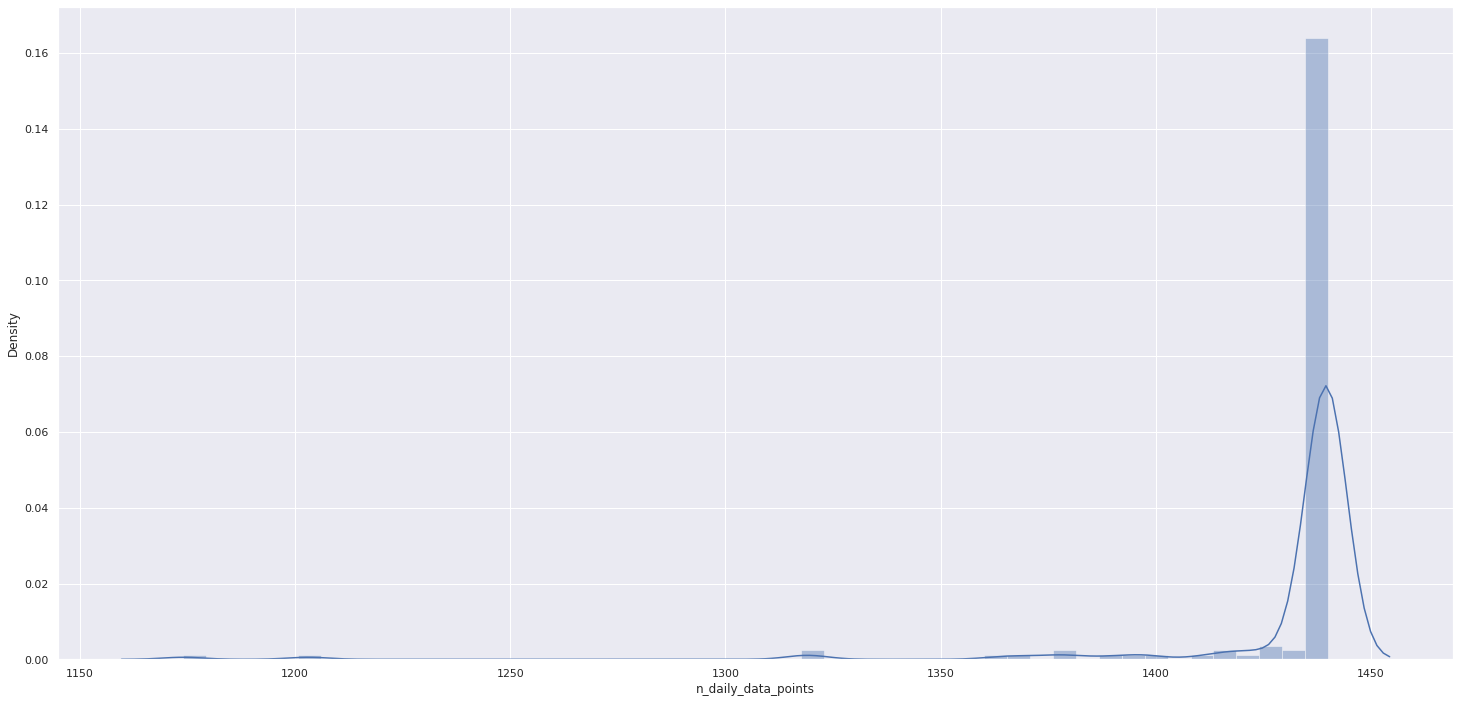

In [ ]:
plt.subplot(1,1,1)
sns.distplot( df2['n_daily_data_points'], kde=True )


### 3.1.2 Numerical Attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f942c850>,
      dtype=object)

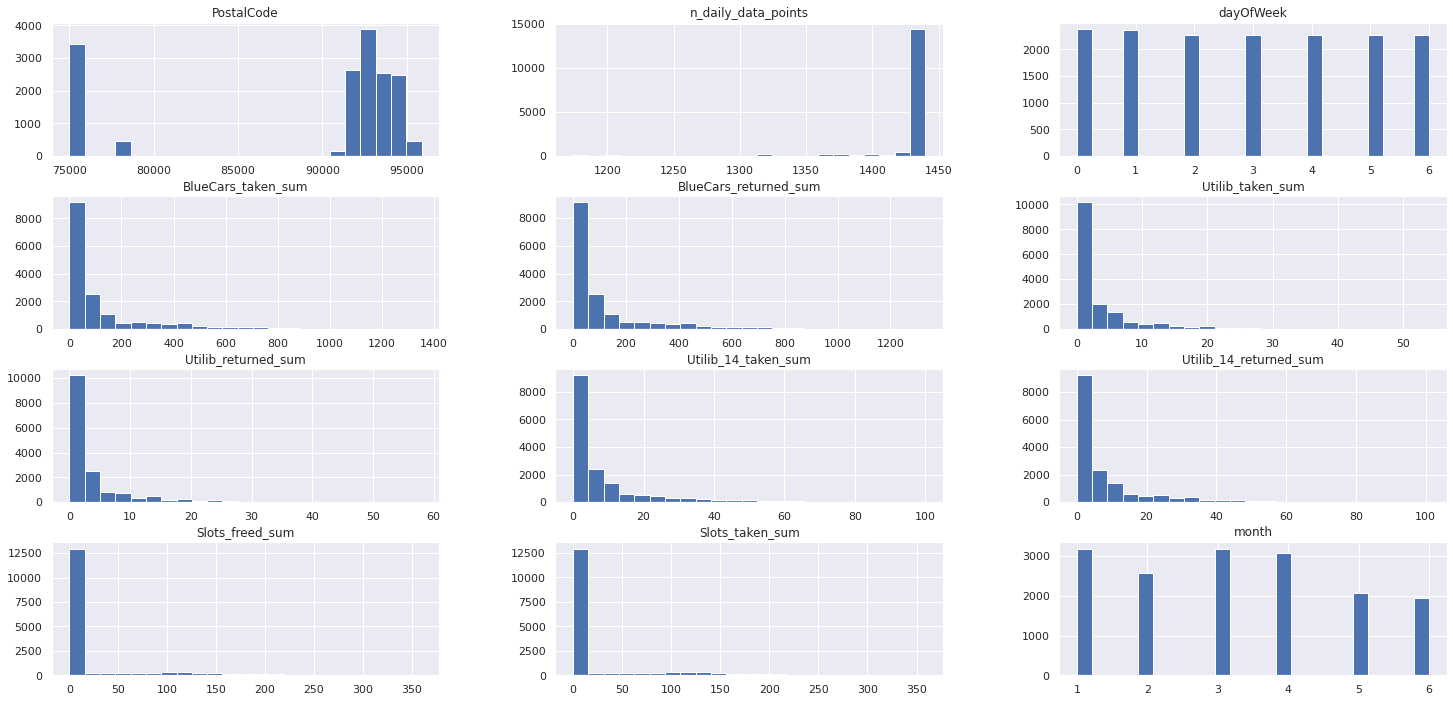

In [ ]:
num_attributes.hist(bins = 23)

### 3.1.3 Categorical Attributes

In [ ]:
cat_attributes.sample(5)

,day_type
11289,weekday
920,weekday
10022,weekday
6111,weekday
6848,weekday


In [ ]:
df2.dayOfWeek = df2.dayOfWeek.astype(str)
df2.month = df2.month.astype(str)
df2.BlueCars_taken_sum = df2.BlueCars_taken_sum.astype(float)
df2.Utilib_14_taken_sum= df2.Utilib_14_taken_sum.astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


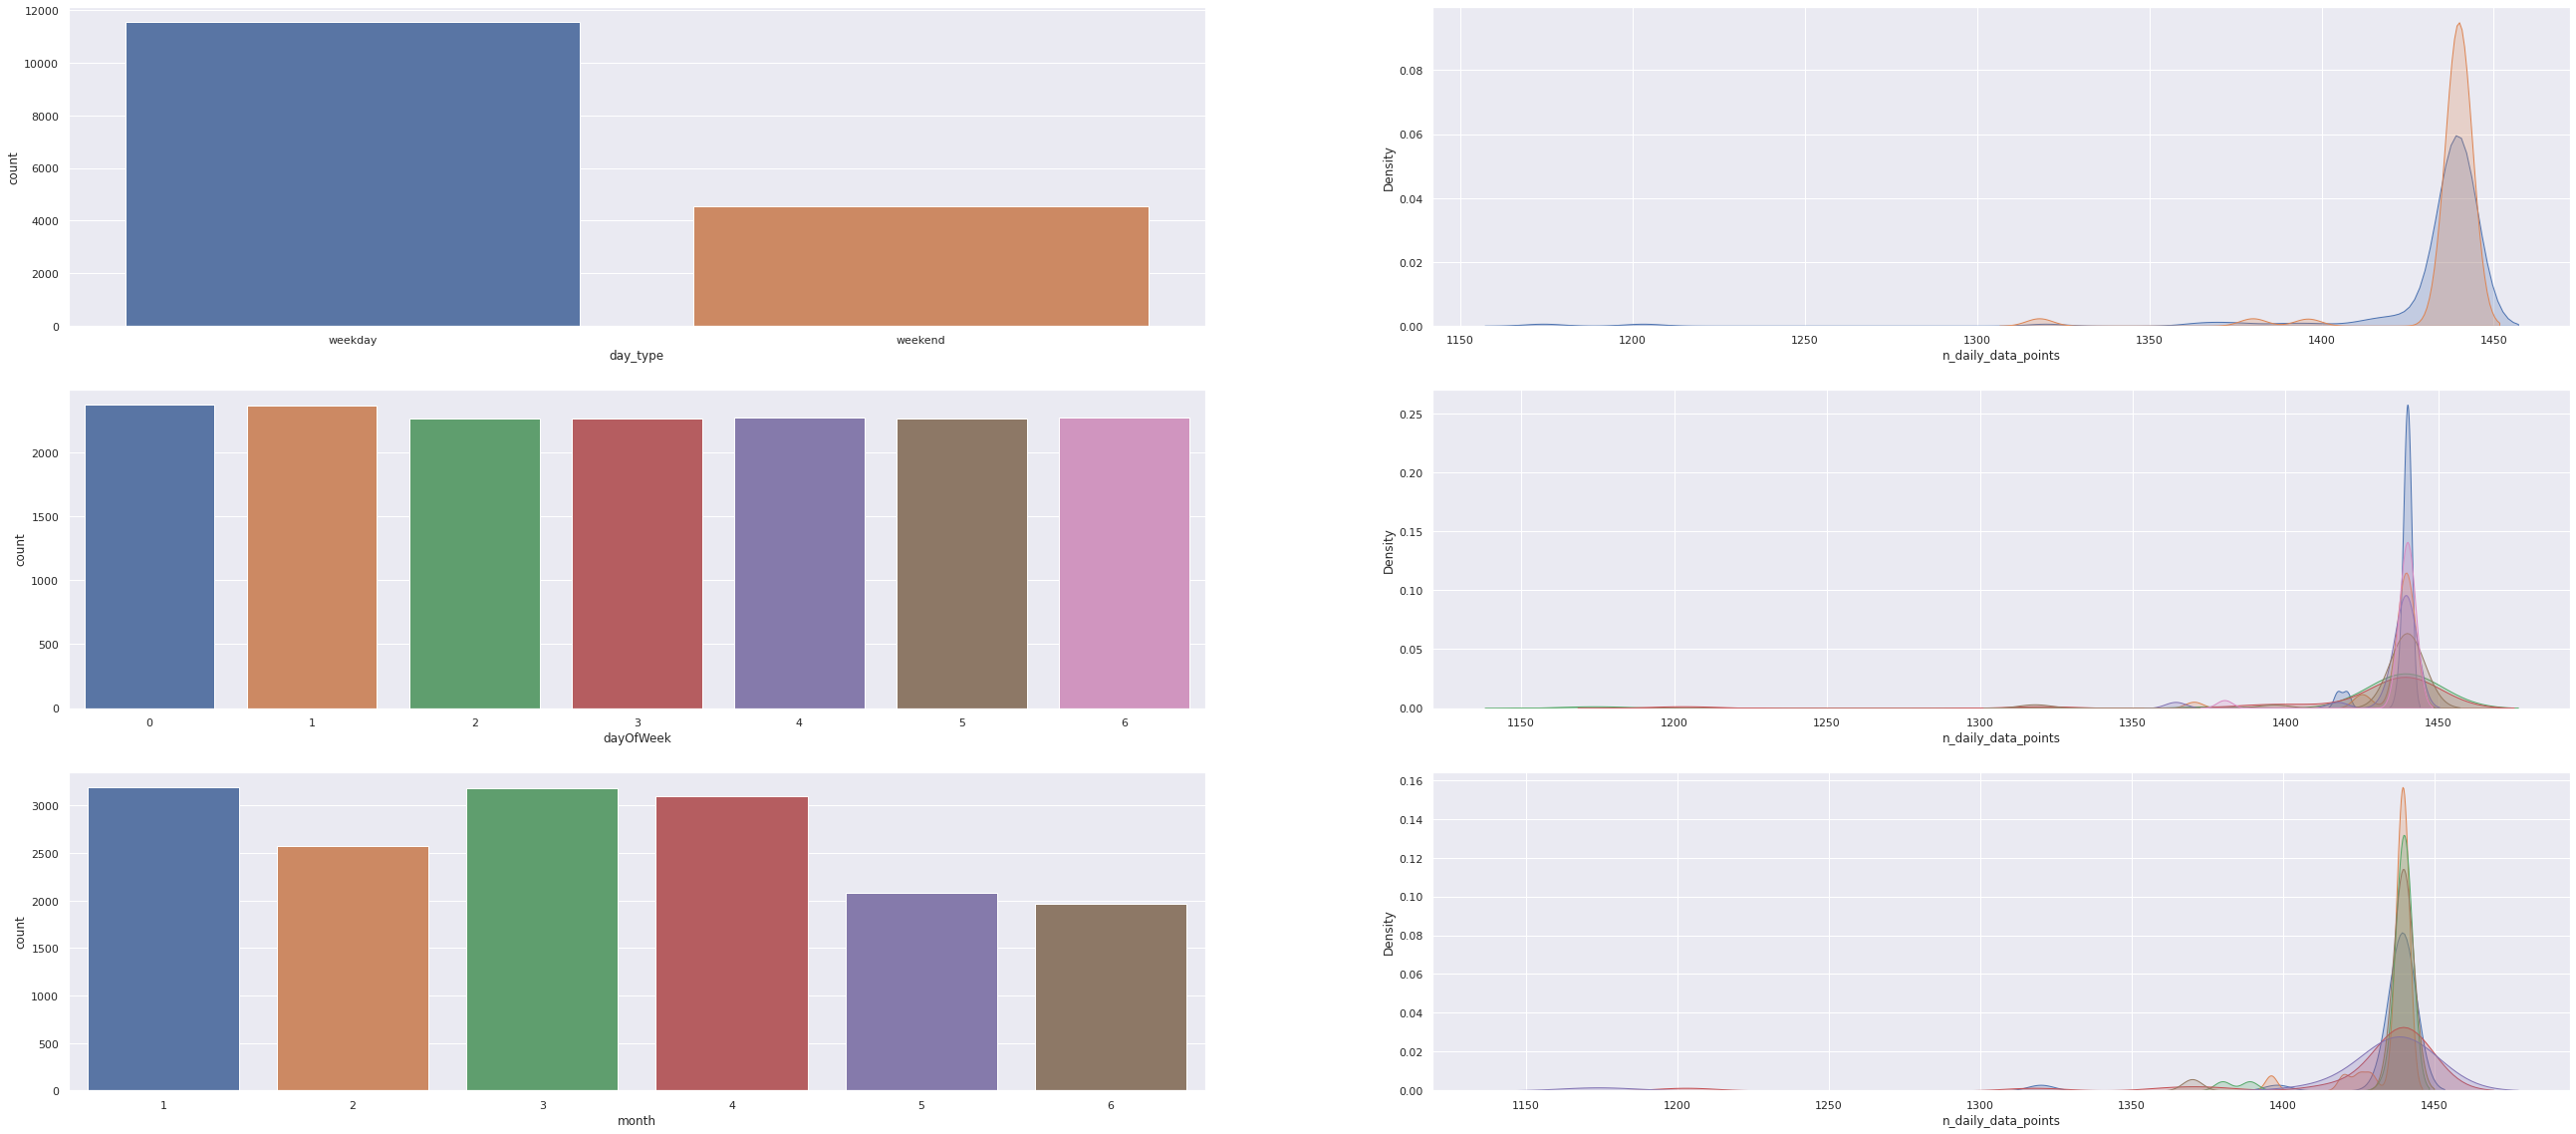

In [ ]:
plt.figure(figsize=(45,20))
plt.subplot(3,2,1)
sns.countplot(df2['day_type'])

plt.subplot(3,2,2)
sns.kdeplot( df2[df2['day_type'] == 'weekday']['n_daily_data_points'], label='Weekday', shade=True )
sns.kdeplot( df2[df2['day_type'] == 'weekend']['n_daily_data_points'], label='Weekend', shade=True )

plt.subplot(3,2,3)
sns.countplot(df2['dayOfWeek'])

plt.subplot(3,2,4)
sns.kdeplot( df2[df2['dayOfWeek'] == '0']['n_daily_data_points'], label='Sunday', shade=True )
sns.kdeplot( df2[df2['dayOfWeek'] == '1']['n_daily_data_points'], label='Monday', shade=True )
sns.kdeplot( df2[df2['dayOfWeek'] == '2']['n_daily_data_points'], label='Tuesday', shade=True )
sns.kdeplot( df2[df2['dayOfWeek'] == '3']['n_daily_data_points'], label='Wednesday', shade=True )
sns.kdeplot( df2[df2['dayOfWeek'] == '4']['n_daily_data_points'], label='Thursday', shade=True )
sns.kdeplot( df2[df2['dayOfWeek'] == '5']['n_daily_data_points'], label='Friday', shade=True )
sns.kdeplot( df2[df2['dayOfWeek'] == '6']['n_daily_data_points'], label='Saturday', shade=True )

plt.subplot(3, 2, 5)
sns.countplot(df2['month'])

plt.subplot(3, 2, 6)

sns.kdeplot( df2[df2['month'] == '1']['n_daily_data_points'], label='January', shade=True )
sns.kdeplot( df2[df2['month'] == '2']['n_daily_data_points'], label='February', shade=True )
sns.kdeplot( df2[df2['month'] == '3']['n_daily_data_points'], label='March', shade=True )
sns.kdeplot( df2[df2['month'] == '4']['n_daily_data_points'], label='April', shade=True )
sns.kdeplot( df2[df2['month'] == '5']['n_daily_data_points'], label='May', shade=True )
sns.kdeplot( df2[df2['month'] == '6']['n_daily_data_points'], label='June', shade=True )


In [ ]:
df.n_daily_data_points.unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [ ]:
df.PostalCode = df.PostalCode.astype(str)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 <a list of 104 Text major ticklabel objects>)

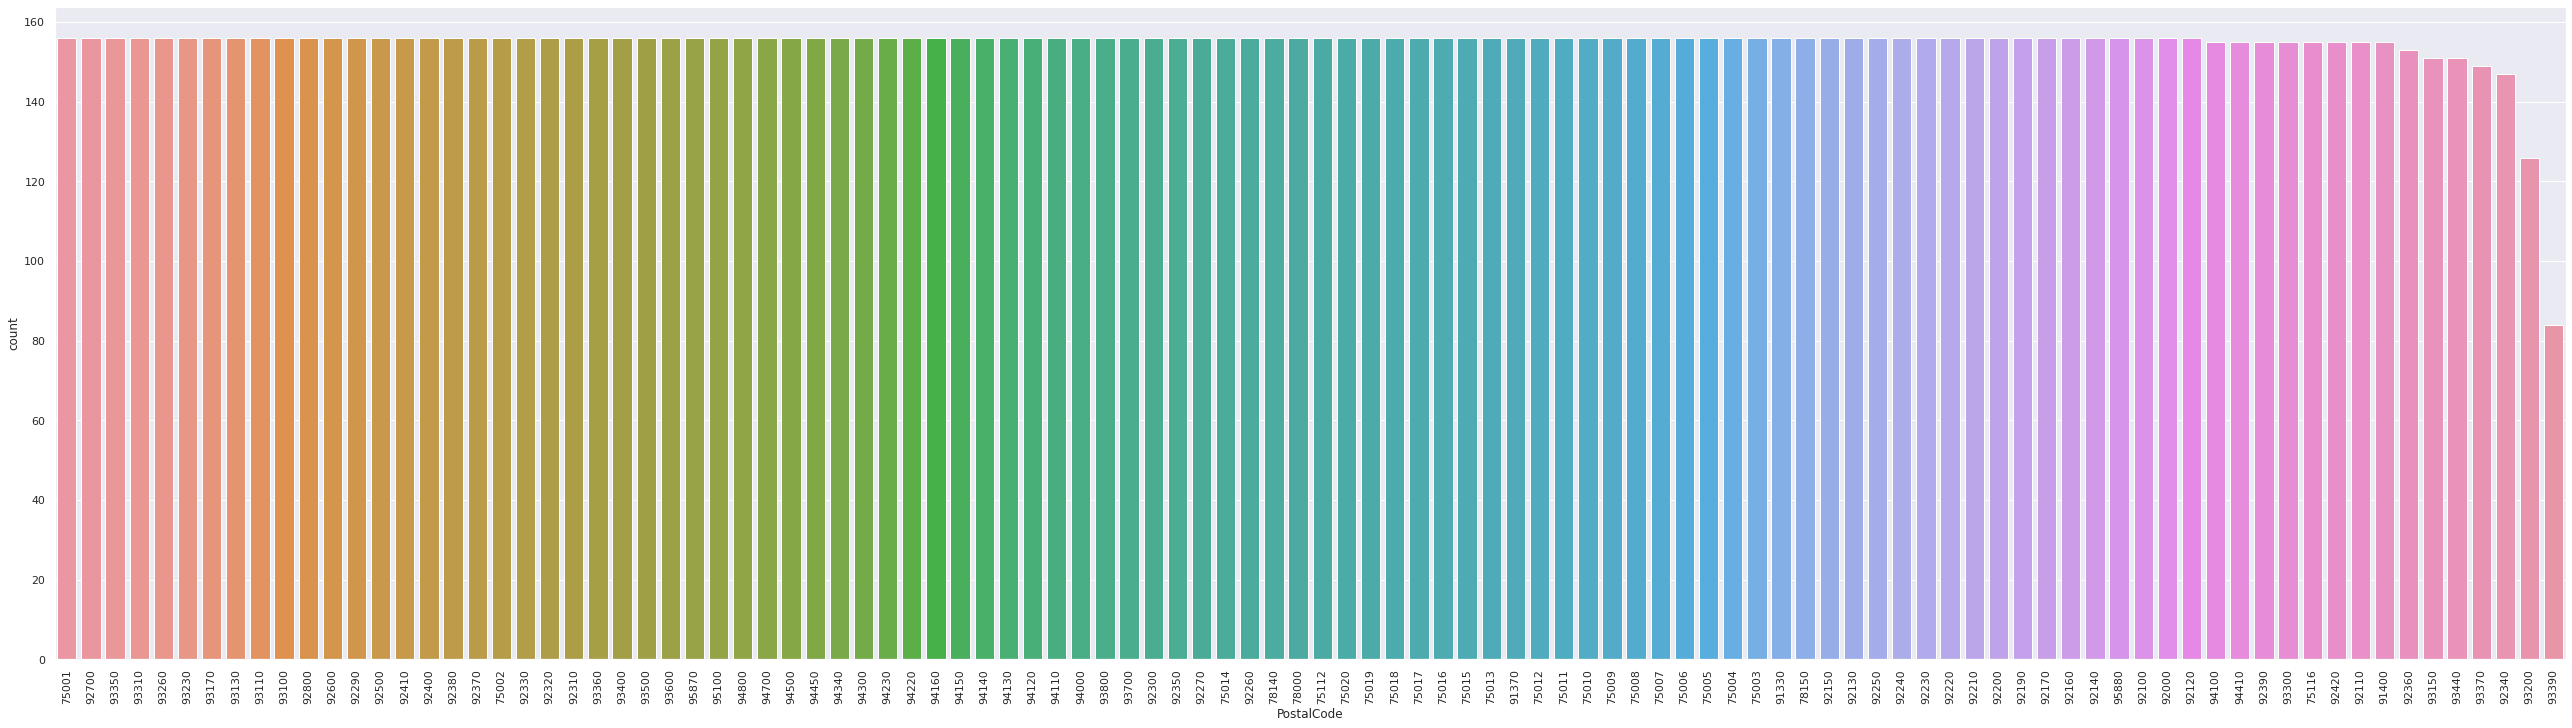

In [ ]:
plt.figure(figsize=(45,12)) 
sns.countplot(df2['PostalCode'],
              order = df2['PostalCode'].value_counts().index)
plt.xticks(rotation = 90) 

## 3.2 Bivariate Analysis

In [ ]:
df2.columns

Index(['PostalCode', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum', 'month'],
      dtype='object')

#### H0 Weekdays have a higher activity than wekends because of work

**False** H1 Weekends starting from Friday to Saturday have higher cars taken than weekdays.

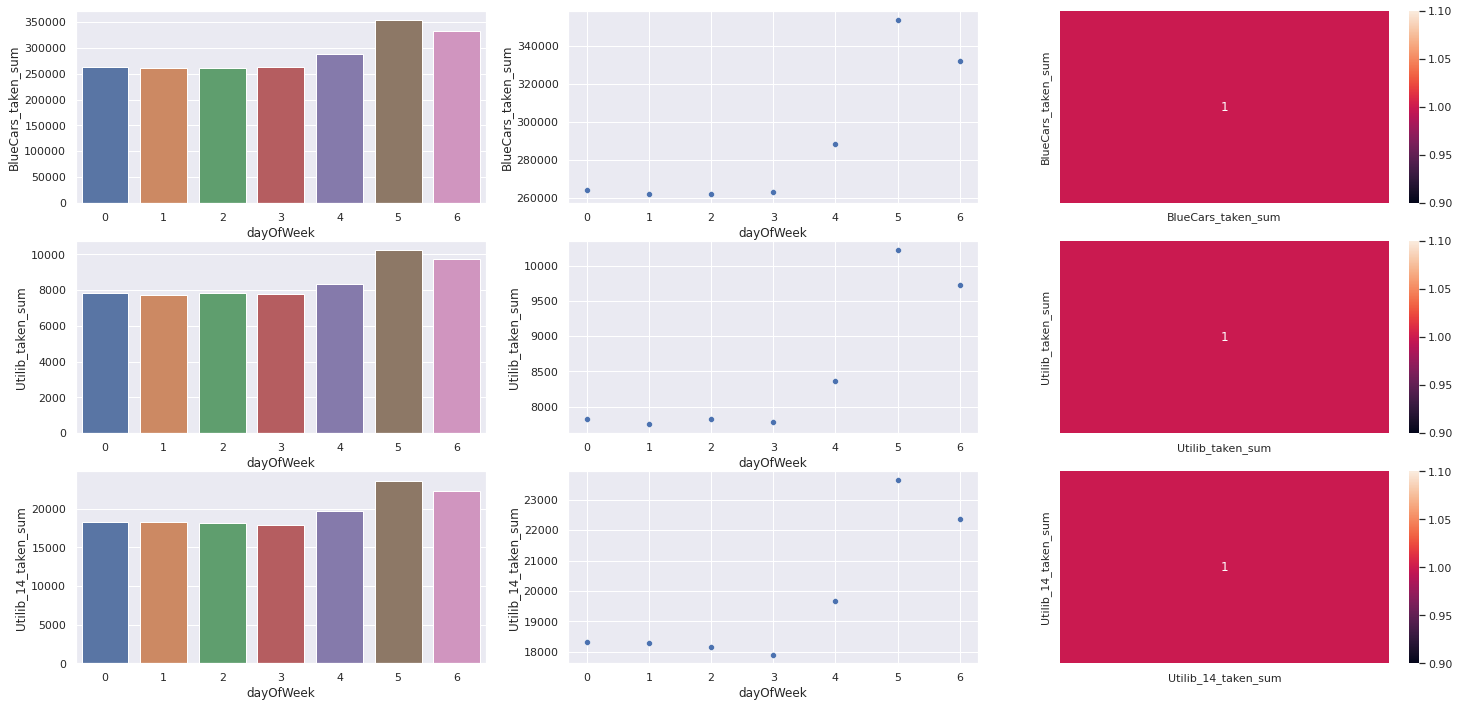

In [ ]:
plt.subplot(3,3,1)
aux1 = df2[['dayOfWeek', 'BlueCars_taken_sum']].groupby( 'dayOfWeek' ).sum().reset_index()
sns.barplot( x='dayOfWeek', y='BlueCars_taken_sum', data=aux1)

plt.subplot(3,3,2)
sns.scatterplot( x='dayOfWeek', y='BlueCars_taken_sum', data=aux1 )

plt.subplot(3,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True )


plt.subplot(3,3,4)
aux2 = df2[['dayOfWeek', 'Utilib_taken_sum']].groupby( 'dayOfWeek' ).sum().reset_index()
sns.barplot( x='dayOfWeek', y='Utilib_taken_sum', data=aux2)

plt.subplot(3,3,5)
sns.scatterplot( x='dayOfWeek', y='Utilib_taken_sum', data=aux2 )

plt.subplot(3,3,6)
sns.heatmap( aux2.corr( method='pearson' ), annot=True )

plt.subplot(3,3,7)
aux3 = df2[['dayOfWeek', 'Utilib_14_taken_sum']].groupby( 'dayOfWeek' ).sum().reset_index()
sns.barplot( x='dayOfWeek', y='Utilib_14_taken_sum', data=aux3)

plt.subplot(3,3,8)
sns.scatterplot( x='dayOfWeek', y='Utilib_14_taken_sum', data=aux3 )

plt.subplot(3,3,9)
sns.heatmap( aux3.corr( method='pearson' ), annot=True )



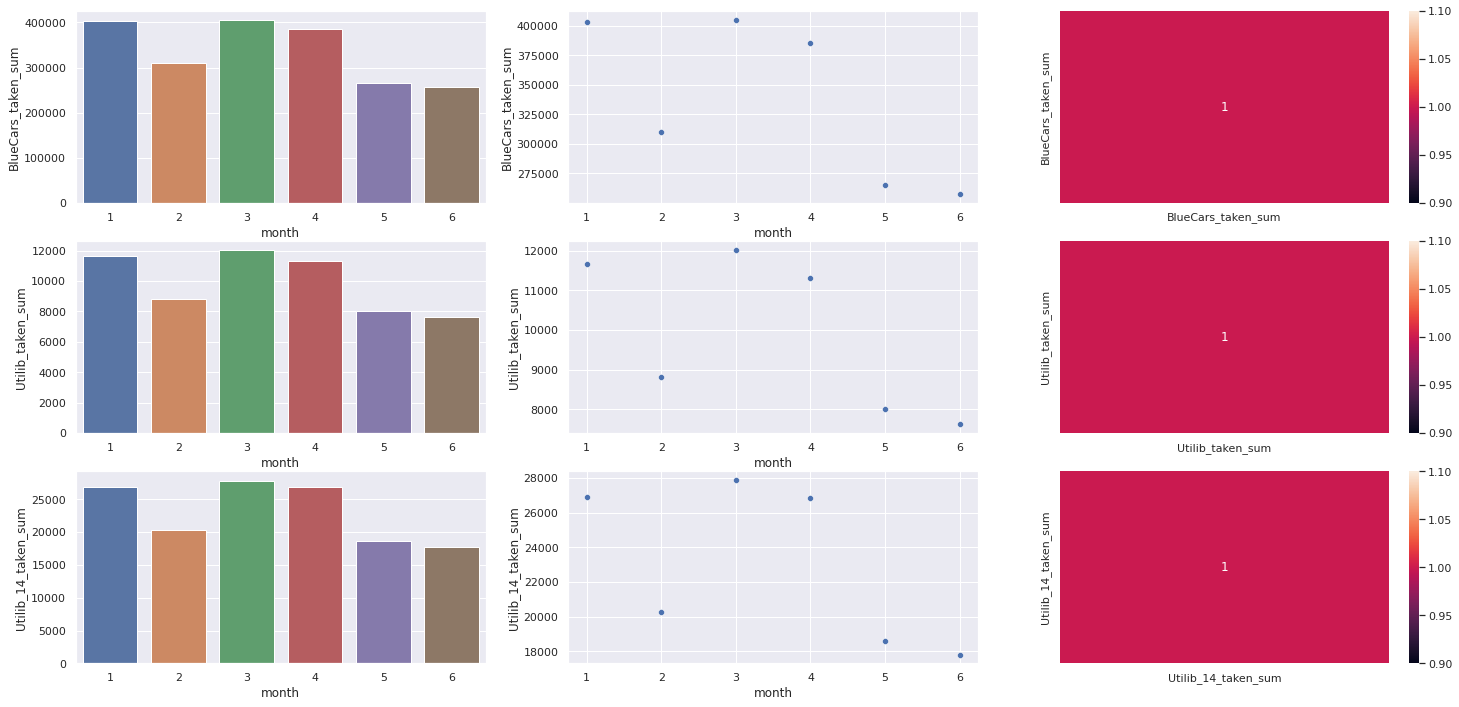

In [ ]:
plt.subplot(3,3,1)
aux4 = df2[['month', 'BlueCars_taken_sum']].groupby( 'month' ).sum().reset_index()
sns.barplot( x='month', y='BlueCars_taken_sum', data=aux4)

plt.subplot(3,3,2)
sns.scatterplot( x='month', y='BlueCars_taken_sum', data=aux4)

plt.subplot(3,3,3)
sns.heatmap( aux4.corr( method='pearson' ), annot=True )


plt.subplot(3,3,4)
aux5 = df2[['month', 'Utilib_taken_sum']].groupby( 'month' ).sum().reset_index()
sns.barplot( x='month', y='Utilib_taken_sum', data=aux5)

plt.subplot(3,3,5)
sns.scatterplot( x='month', y='Utilib_taken_sum', data=aux5)

plt.subplot(3,3,6)
sns.heatmap( aux5.corr( method='pearson' ), annot=True )

plt.subplot(3,3,7)
aux6 = df2[['month', 'Utilib_14_taken_sum']].groupby( 'month' ).sum().reset_index()
sns.barplot( x='month', y='Utilib_14_taken_sum', data=aux6)

plt.subplot(3,3,8)
sns.scatterplot( x='month', y='Utilib_14_taken_sum', data=aux6 )

plt.subplot(3,3,9)
sns.heatmap( aux6.corr( method='pearson' ), annot=True )

##### H0 CBDs have a higher activity of cars than Suburbs
True Boroughs around city of paris have a lot of volume

In [ ]:
df2.PostalCode.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

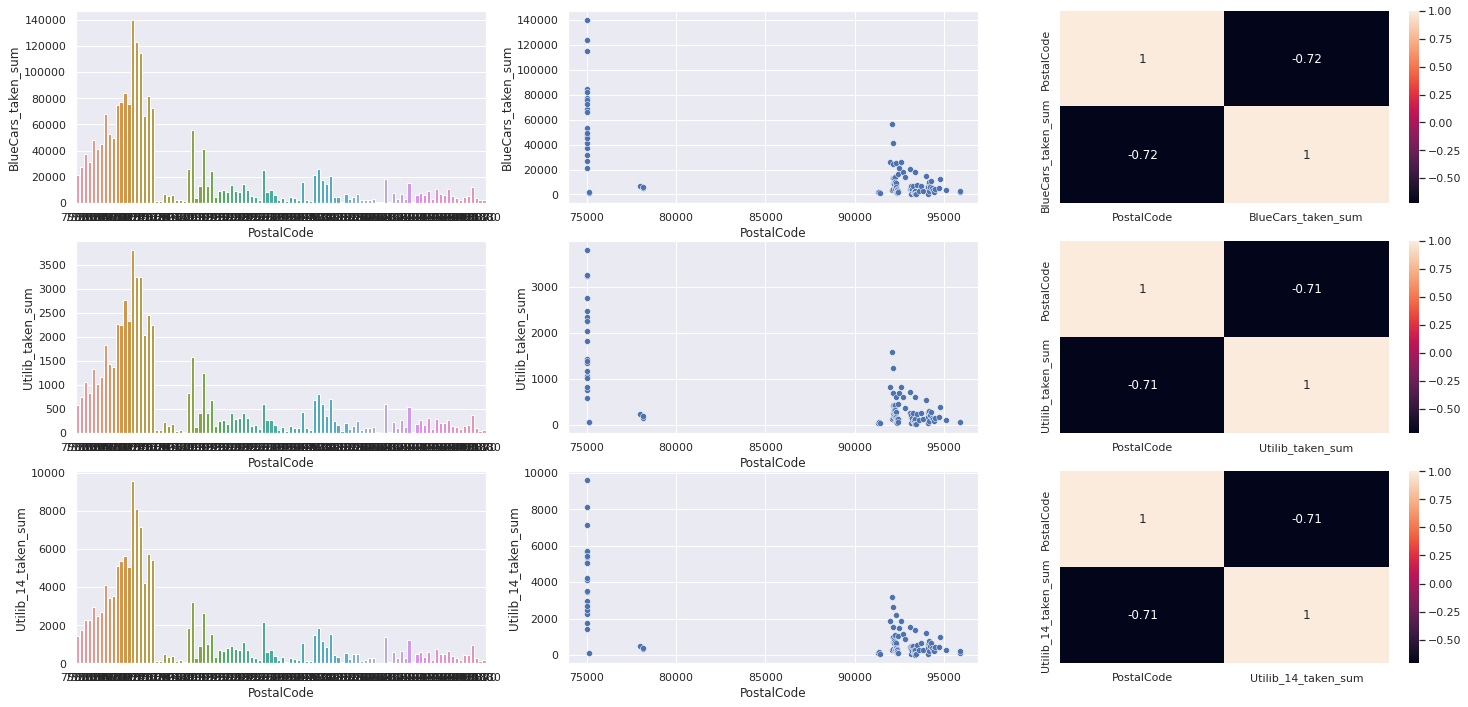

In [ ]:
plt.subplot(3,3,1)
aux1 = df2[['PostalCode', 'BlueCars_taken_sum']].groupby( 'PostalCode' ).sum().reset_index()
sns.barplot( x='PostalCode', y='BlueCars_taken_sum', data=aux1)

plt.subplot(3,3,2)
sns.scatterplot( x='PostalCode', y='BlueCars_taken_sum', data=aux1 )

plt.subplot(3,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True )


plt.subplot(3,3,4)
aux2 = df2[['PostalCode', 'Utilib_taken_sum']].groupby( 'PostalCode' ).sum().reset_index()
sns.barplot( x='PostalCode', y='Utilib_taken_sum', data=aux2)

plt.subplot(3,3,5)
sns.scatterplot( x='PostalCode', y='Utilib_taken_sum', data=aux2 )

plt.subplot(3,3,6)
sns.heatmap( aux2.corr( method='pearson' ), annot=True )

plt.subplot(3,3,7)
aux3 = df2[['PostalCode', 'Utilib_14_taken_sum']].groupby( 'PostalCode' ).sum().reset_index()
sns.barplot( x='PostalCode', y='Utilib_14_taken_sum', data=aux3)

plt.subplot(3,3,8)
sns.scatterplot( x='PostalCode', y='Utilib_14_taken_sum', data=aux3 )

plt.subplot(3,3,9)
sns.heatmap( aux3.corr( method='pearson' ), annot=True )


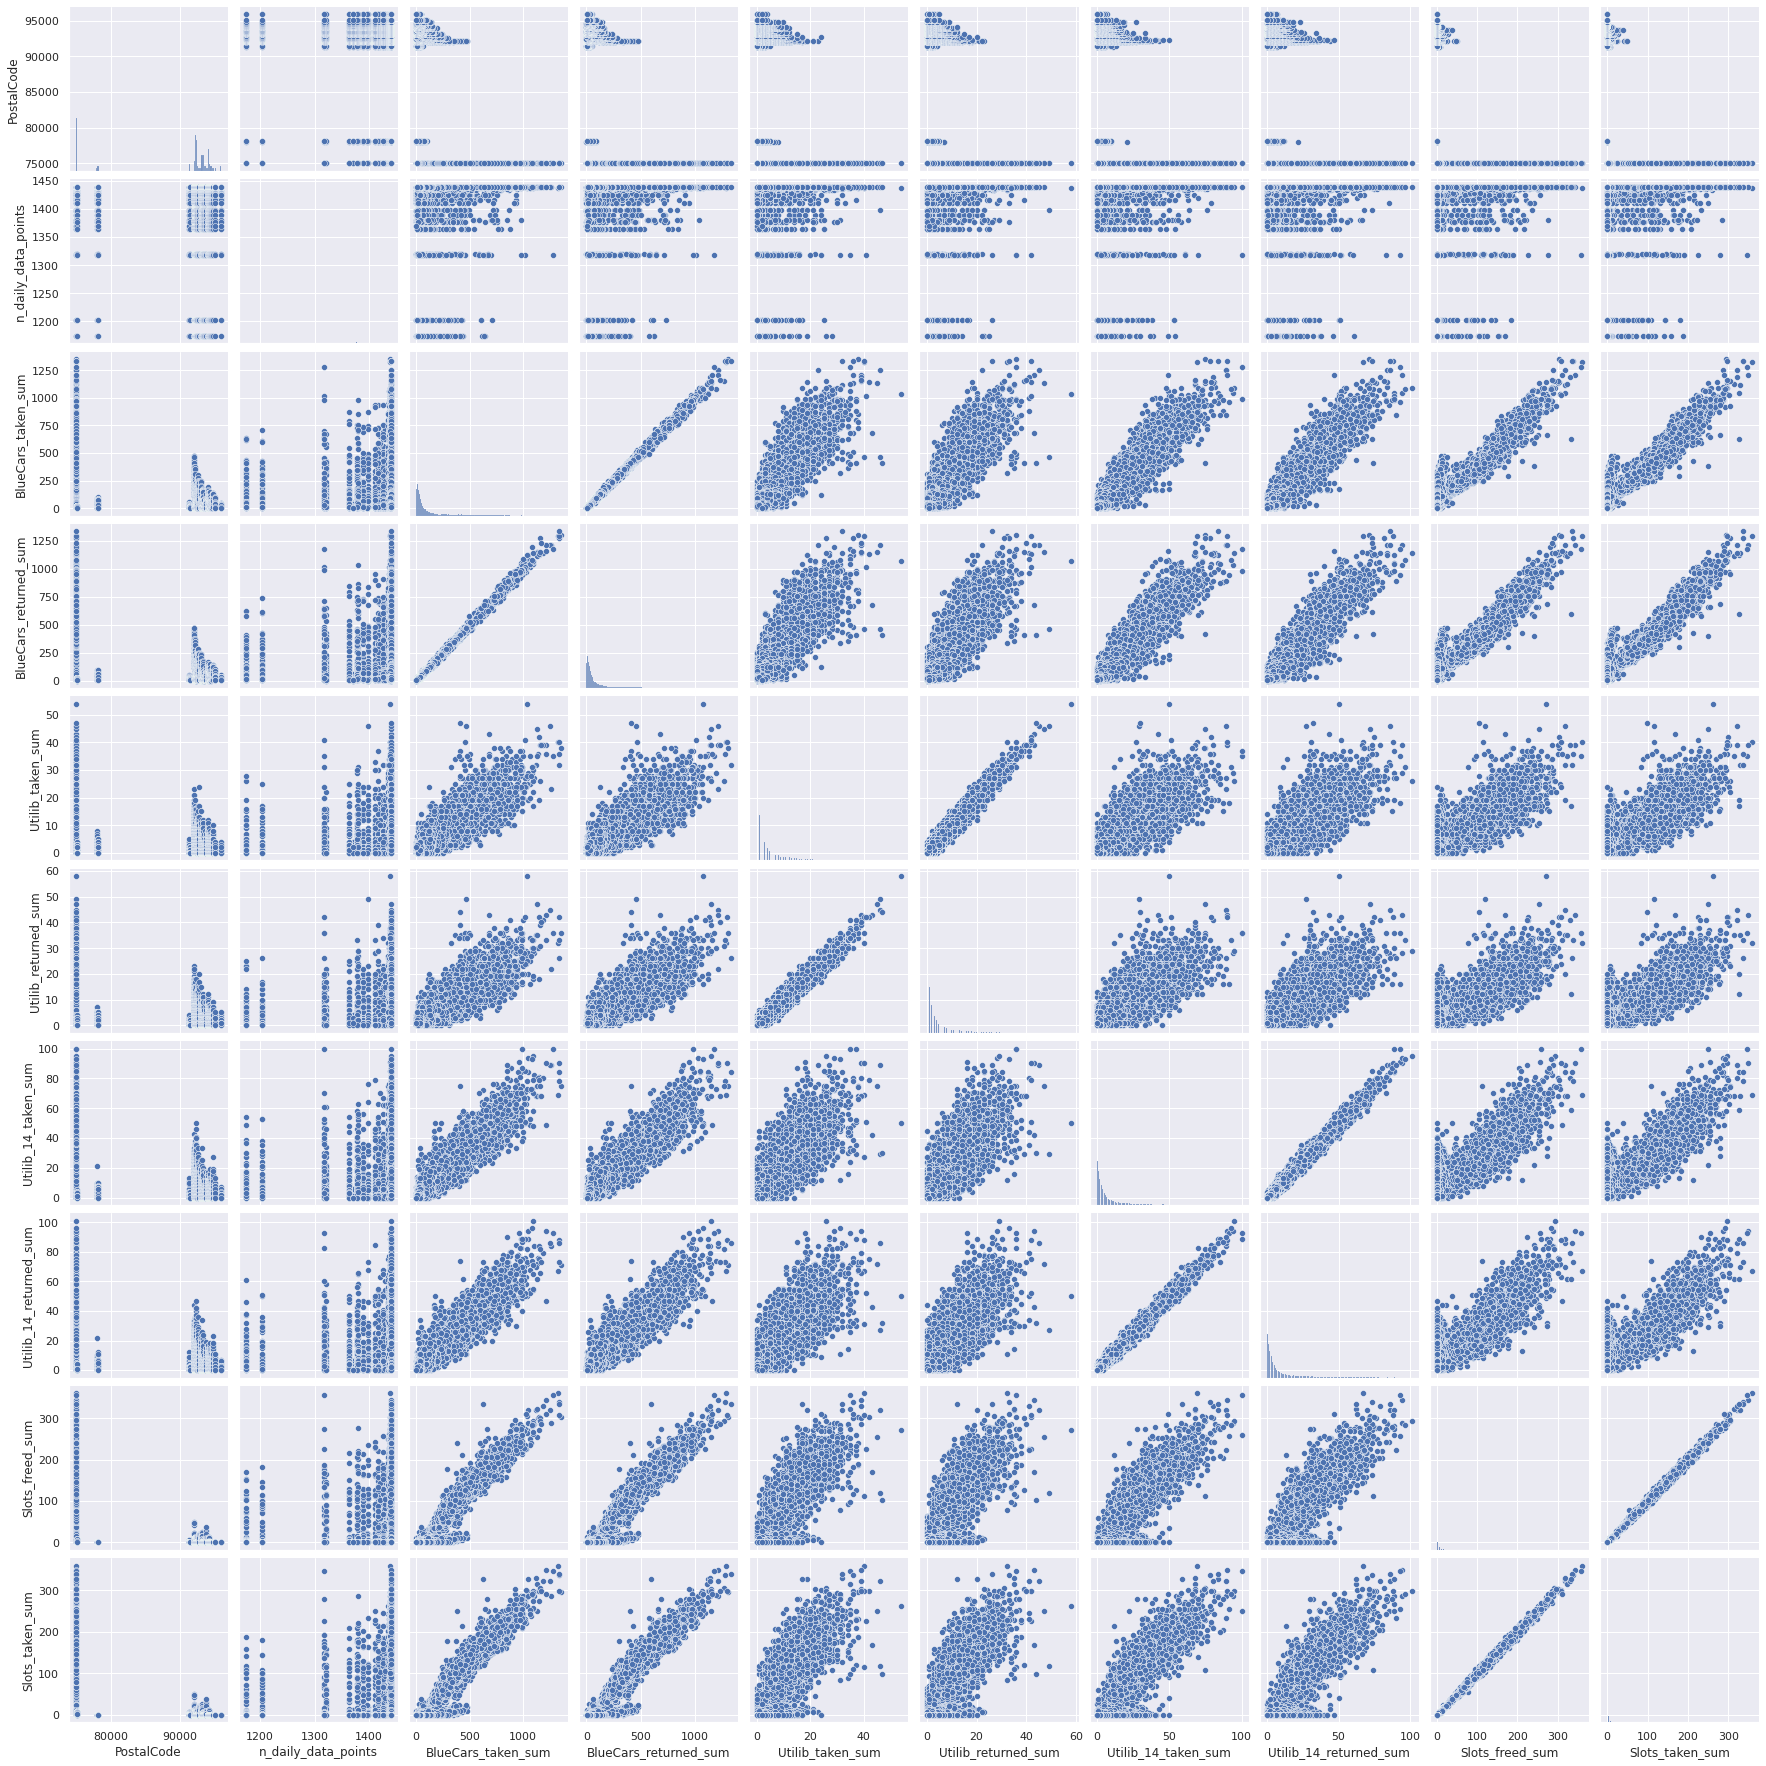

In [ ]:
sns.pairplot(df2)

## 3.3 Multivariate Analysis

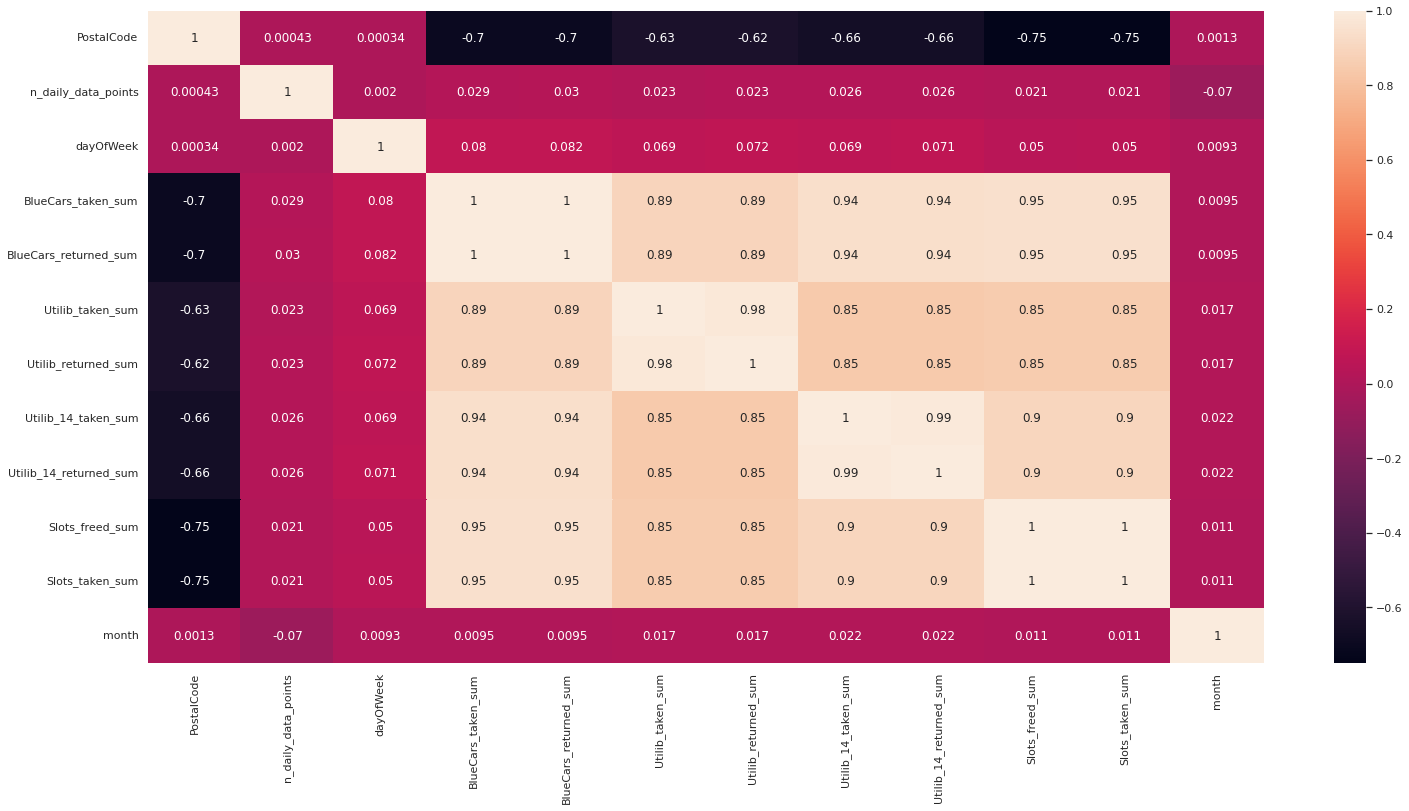

In [ ]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )